In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 

In [2]:
path='/shared/ccsm4/khuang/obs/NOAA-OLR/'
file = 'NOAA.OLR.daily.mean.1979-2019.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

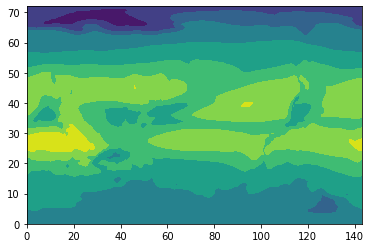

In [4]:
ds_mean=ds.mean(dim='time')
plt.contourf(ds_mean['olr'])

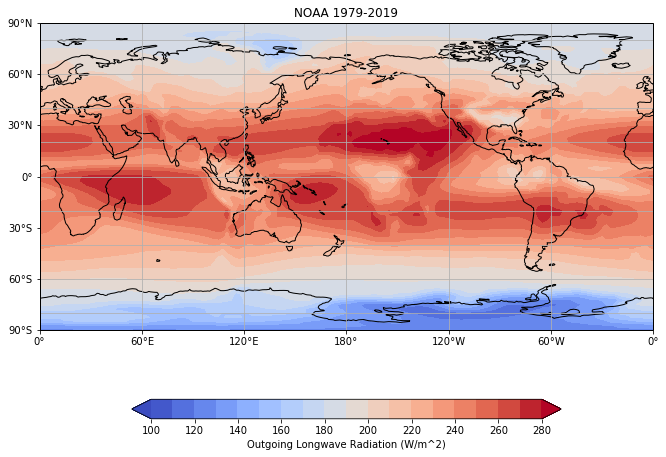

In [9]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

clevs = np.arange(100,290,10) 

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point 
data=ds_mean['olr']
data, lon=add_cyclic_point(data,coord=ds_mean['lon'])

# Make a filled contour plot 
cs=ax.contourf(lon,ds_mean['lat'],
            data,clevs,
            trasform=ccrs.PlateCarree(),
            cmap='coolwarm',extend='both')

# Add coastlines 
ax.coastlines()

# Add gridlines 
ax.gridlines()

# Define the xticks for longitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree(central_longitude=180))
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude 
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree(central_longitude=180))
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar 
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                  label='Outgoing Longwave Radiation (W/m^2)')

# Add title 
plt.title('NOAA 1979-2019')
plt.savefig('./Figs/OLR_annual_mean.png')